In [26]:
import pandas as pd
import missingno as msno
import os

path = os.path.join(os.getcwd(), 'extracted/Carriers v20201201/csv/encounter.csv')
df = pd.read_csv('final.csv')
df.head()

,Unnamed: 0,id,type,start,end,lat,lon,vessel.id,vessel.type,vessel.mmsi,...,encounter.encountered_vessel.destination_port.name,encounter.encountered_vessel.authorizations.authorized,encounter.encountered_vessel.authorizations.unknown,loitering.total_distance_km,loitering.loitering_hours,port.lat,port.lon,port.country,port.name,date
0,0,f6f02128e9fb54c8ea1bc7987f8d46d7.1,encounter,2015-02-02 23:40:00 UTC,2015-02-03 05:30:00 UTC,-45.583971,-60.494544,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,...,RECALADA,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
1,1,1193f92e4aa29480fbfa2ace644fa143.1,encounter,2015-05-29 15:30:00 UTC,2015-05-30 08:30:00 UTC,-45.505687,-60.486374,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,...,PUNTA ARENAS,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
2,2,ea7ca74af5300c273a0ce288f129763e.1,encounter,2015-02-19 15:50:00 UTC,2015-02-19 21:40:00 UTC,-45.534999,-60.493174,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,...,NaN,NaN,ICCAT|CCSBT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
3,3,7a6a1688b85b7e12770ed2385dd38656.1,encounter,2015-02-17 15:30:00 UTC,2015-02-17 21:10:00 UTC,-45.554563,-60.497218,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,...,MONTEVIDEO,NaN,CCSBT|ICCAT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01
4,4,5489a5c393dafcb70b4f29d0b52786c7.1,encounter,2015-02-15 17:40:00 UTC,2015-02-16 00:20:00 UTC,-45.554497,-60.495039,000702b7e-e442-5969-7849-35ea992140af,carrier,636015528,...,ZHOUSHAN,NaN,CCSBT|ICCAT,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-01


In [27]:
def count_unknown(s):
    if s == 'NA':
        return 0
    else:
        return len(str(s).split('|'))

<AxesSubplot:>

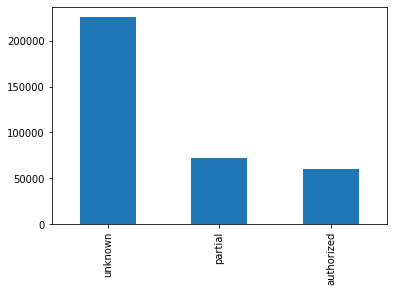

In [28]:
df['encounter.authorization_status'].value_counts().plot(kind='bar')

In [29]:
df['unauthorized_count'] = df['encounter.encountered_vessel.authorizations.unknown'].fillna('NA').apply(count_unknown)


<AxesSubplot:>

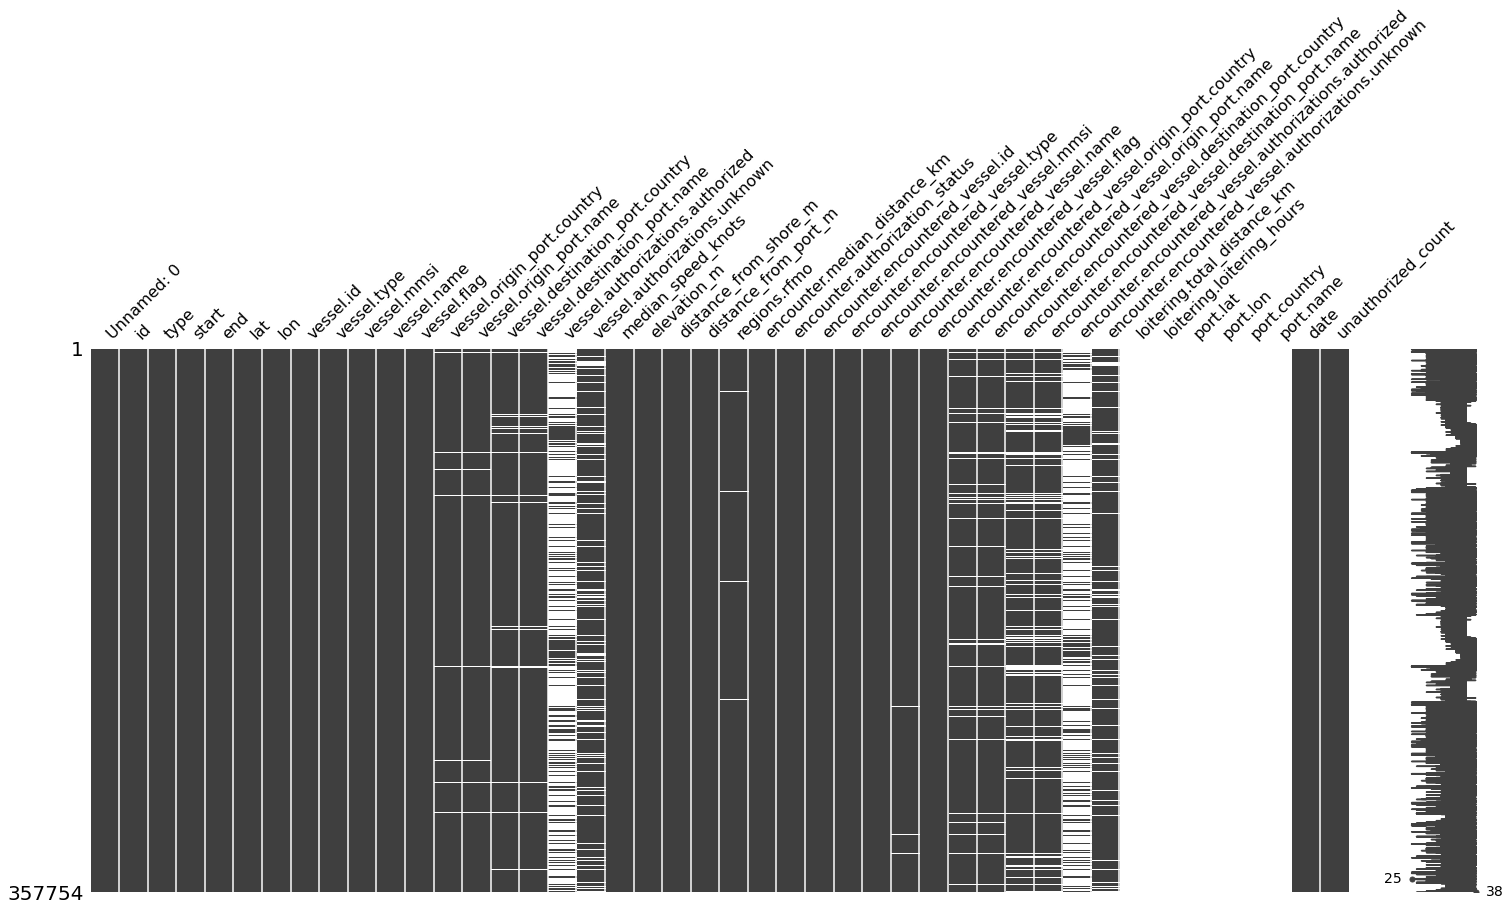

In [30]:
msno.matrix(df)

In [31]:
df.dtypes

Unnamed: 0                                                  int64
id                                                         object
type                                                       object
start                                                      object
end                                                        object
lat                                                       float64
lon                                                       float64
vessel.id                                                  object
vessel.type                                                object
vessel.mmsi                                                 int64
vessel.name                                                object
vessel.flag                                                object
vessel.origin_port.country                                 object
vessel.origin_port.name                                    object
vessel.destination_port.country                            object
vessel.des

In [32]:
# df.drop(
#     ['type',
#      'id',
#      'vessel.type',
#      'vessel.id',
#      'vessel.mmsi',
#      'vessel.flag',
#      'loitering.total_distance_km',
#      'loitering.loitering_hours',
#      'port.lat',
#      'port.lon',
#      'port.name',
#      'port.country'],
#      axis=1, inplace=True)

In [33]:
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['duration'] = (df['end'] - df['start']).dt.seconds /60

In [34]:
df.dtypes

Unnamed: 0                                                              int64
id                                                                     object
type                                                                   object
start                                                     datetime64[ns, UTC]
end                                                       datetime64[ns, UTC]
lat                                                                   float64
lon                                                                   float64
vessel.id                                                              object
vessel.type                                                            object
vessel.mmsi                                                             int64
vessel.name                                                            object
vessel.flag                                                            object
vessel.origin_port.country                                      

In [35]:
df['is_authorized'] = df['encounter.authorization_status'].apply(lambda x: 2 if x == 'authorized' else (1 if x == 'partial' else 0))

In [36]:
df = df[['median_speed_knots', 'elevation_m', 'distance_from_shore_m', 'distance_from_port_m', 'encounter.median_distance_km', 'duration', 'is_authorized']]
df

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
0,0.028,-105,396000,417048.781,0.052,350.0,0
1,0.016,-111,394000,415769.344,0.047,1020.0,0
2,0.019,-101,394000,416120.438,0.037,350.0,0
3,0.041,-90,394000,415715.250,0.049,340.0,0
4,0.016,-90,394000,415715.250,0.064,400.0,0
...,...,...,...,...,...,...,...
357749,0.009,-21,1000,17866.998,0.161,920.0,2
357750,0.007,-21,1000,17866.998,0.245,610.0,2
357751,0.010,-45,2000,31134.578,0.011,680.0,2
357752,0.016,-6,1000,57596.129,0.339,950.0,2


In [37]:
df.is_authorized.value_counts()

0    225217
1     72579
2     59958
Name: is_authorized, dtype: int64

In [39]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df[['median_speed_knots', 'elevation_m', 'distance_from_shore_m', 'distance_from_port_m', 'encounter.median_distance_km', 'duration']]  # Features
y = df['is_authorized']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [40]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Training Accuracy = ", clf.score(X_train, y_train))
print("Test Accuracy = ", clf.score(X_test, y_test))

Training Accuracy =  0.9995128320828026
Test Accuracy =  0.995397243936754


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

elevation_m                     0.296836
distance_from_port_m            0.221964
distance_from_shore_m           0.185072
median_speed_knots              0.106839
encounter.median_distance_km    0.105867
duration                        0.083423
dtype: float64

In [ ]:
df.corr()

,median_speed_knots,elevation_m,distance_from_shore_m,distance_from_port_m,encounter.median_distance_km,duration,is_authorized
median_speed_knots,1.000000,-0.464996,0.424882,0.391807,-0.175282,-0.161112,-0.130289
elevation_m,-0.464996,1.000000,-0.716083,-0.671710,0.148454,0.200042,0.429121
distance_from_shore_m,0.424882,-0.716083,1.000000,0.929638,-0.154600,-0.204556,-0.214386
distance_from_port_m,0.391807,-0.671710,0.929638,1.000000,-0.158333,-0.187515,-0.193867
encounter.median_distance_km,-0.175282,0.148454,-0.154600,-0.158333,1.000000,-0.045391,-0.047251
duration,-0.161112,0.200042,-0.204556,-0.187515,-0.045391,1.000000,0.094413
is_authorized,-0.130289,0.429121,-0.214386,-0.193867,-0.047251,0.094413,1.000000


<AxesSubplot:xlabel='distance_from_shore_m', ylabel='elevation_m'>

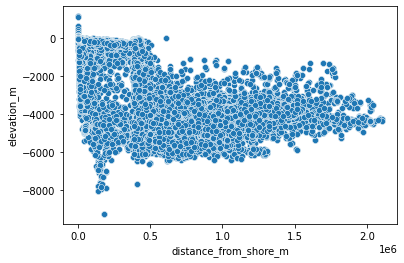

In [ ]:
import seaborn as sns
import numpy as np
sns.scatterplot(x='distance_from_shore_m', y='elevation_m' , data=df)

<AxesSubplot:xlabel='distance_from_shore_m', ylabel='elevation_m'>

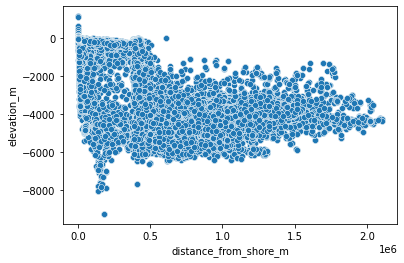

In [ ]:
sns.scatterplot(x='distance_from_shore_m', y='elevation_m' , data=df)